# Codding attension mechanisum 

### Computing attention weights for one word

In [1]:
# input embeding
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
    [0.55, 0.87, 0.66], # journey (x^2)
    [0.57, 0.85, 0.64], # starts (x^3)
    [0.22, 0.58, 0.33], # with (x^4)
    [0.77, 0.25, 0.10], # one (x^5)
    [0.05, 0.80, 0.55]] # step (x^6)
    )

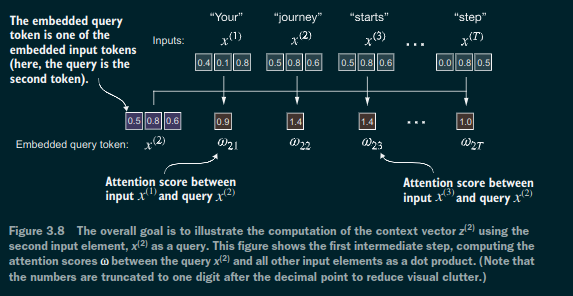

In [2]:
attn_scores_2 = torch.empty(inputs.shape[0])
query = inputs[1]

for i , input in enumerate(inputs):
    attn_scores_2[i] = torch.dot(query,input)

print("Attention scrore b/w input 2 and others inputs")
print(attn_scores_2)

Attention scrore b/w input 2 and others inputs
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


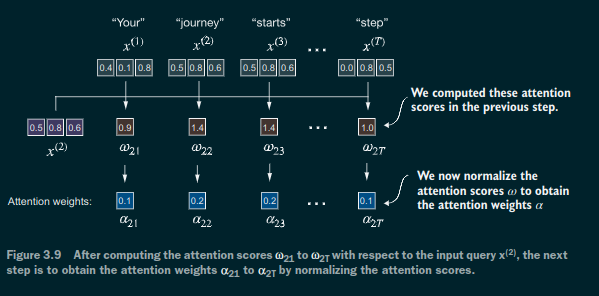

In [3]:
print("Normalized attention score")
nor_attn_2 = attn_scores_2 / attn_scores_2.sum()
print(nor_attn_2)
print("Sum of normalized attention")
print(nor_attn_2.sum())

Normalized attention score
tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of normalized attention
tensor(1.0000)


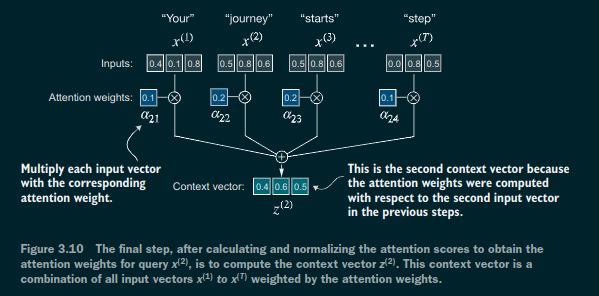

In [4]:
context_vec_2 = torch.zeros(query.shape)
for i , input in enumerate(inputs):
    context_vec_2 += nor_attn_2[i] * input

print(f'Context vector {context_vec_2}')

Context vector tensor([0.4355, 0.6451, 0.5680])


### Computing attention weights for all the words
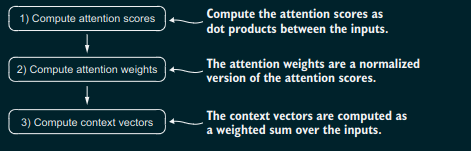

In [5]:
# computing attention scorces b/w the all the inputs

attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [6]:
# normalized attention weights
nor_attn = torch.softmax(attn_scores, dim = -1)
print(nor_attn)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [7]:
# context vector aftering applying attention weights
context_vector = nor_attn @ inputs
print(context_vector)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# Implementing self-attention with trainable weights

### Computing self attention weights for one word

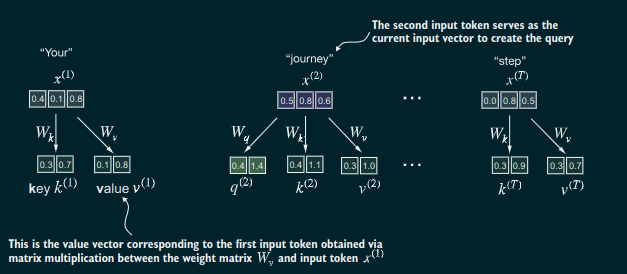

In [8]:
# computing query , key and values pairs
d_in , d_out = inputs.shape[1] , 2
x_2 = inputs[1]

torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

# computing Q,K,V for the second word
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)

tensor([0.4306, 1.4551])


Computing Q,K,V parameters for all the words

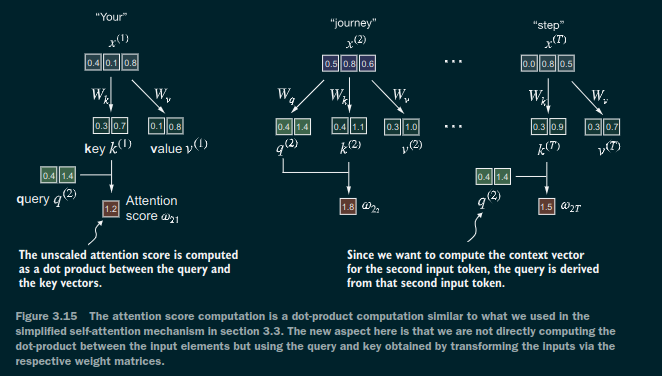

In [9]:
keys = inputs @ W_key
values = inputs @ W_value

print("Keys shape : " , keys.shape)
print("Values shape : " , values.shape)

Keys shape :  torch.Size([6, 2])
Values shape :  torch.Size([6, 2])


In [14]:
# Computing attention score for second word
attn_scores_2 = query_2  @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


Obtaining the attension weights 

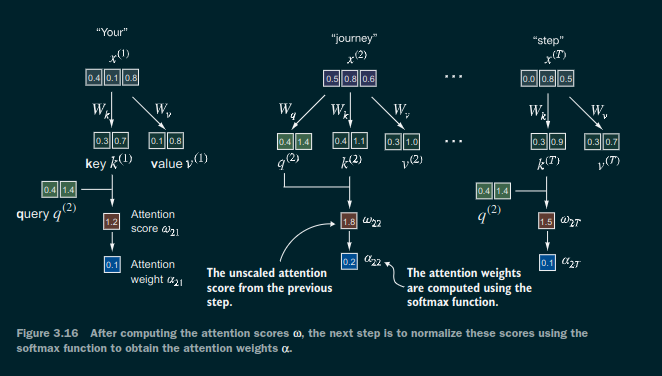

However, now we scale the attention scores by dividing them by the square root of the embedding dimension of the keys (taking the square root is mathematically the same as exponentiating by 0.5):

![Screenshot from 2025-04-19 19-11-19.png](<attachment:Screenshot from 2025-04-19 19-11-19.png>)
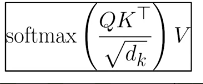

In [15]:
d_k = keys.shape[-1] 
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1) 
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


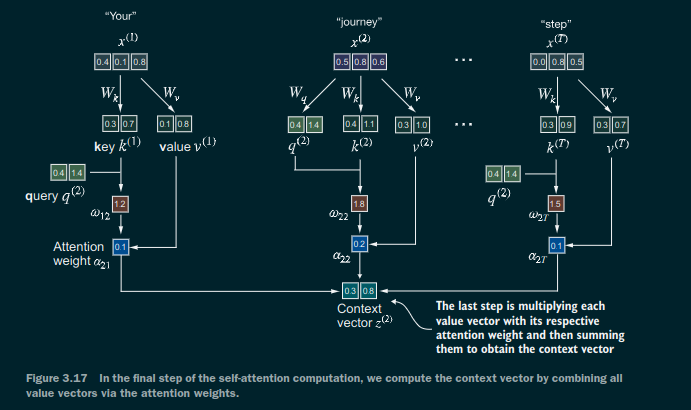

In [16]:
# compute context vector for the second word
context_vector_2 = attn_weights_2 @ values
print(context_vector_2)

tensor([0.3061, 0.8210])


# Compact self-implementation of self attention

In [21]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self,d_in,d_out):
        super().__init__()
        self.W_key = nn.Parameter(torch.rand(d_in,d_out))
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))

    def forward(self,x):
        keys = x @ self.W_key
        querys = x @ self.W_query
        values = x @ self.W_value

        attn_scores = querys @ keys.T
        attn_weights = torch.softmax( attn_scores / keys.shape[1] ** 0.5 , dim=-1)
        context_vector = attn_weights @ values
        return context_vector

torch.manual_seed(123)
model = SelfAttention_v1(d_in,d_out)
model(inputs)

tensor([[0.2947, 0.7956],
        [0.3015, 0.8132],
        [0.3010, 0.8120],
        [0.2925, 0.7902],
        [0.2863, 0.7737],
        [0.2979, 0.8043]], grad_fn=<MmBackward0>)

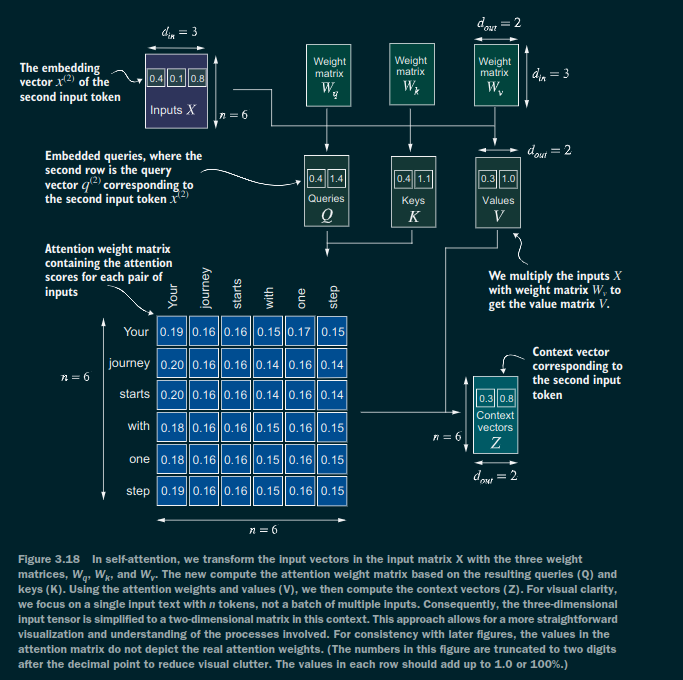

# Masked self attention 